In [1]:
def rectangular(c,a,b):
    import gurobipy as gp 
    from gurobipy import GRB
    import numpy as np
    numRect = 1
    found = []
    
    m = gp.Model("Rectangular Method")
    
    n = a.shape[0]
    cons = b.shape[0]
    

    Items=list(np.arange(n))
    Dimensions= list(np.arange(cons))
    # Decision Vars
    x = m.addVars(n,vtype=GRB.BINARY, name="ToTakeOrNotToTake")

    #Mute Output Text
    m.Params.OutputFlag = 0


    #Knapsack Constraints
    for j in Dimensions:
        m.addConstr(gp.quicksum(x[i]*a[i,j] for i in Items) <= b[j], name="j"+str(j))

    #NW 
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    if m.status != 2:
        return [],1
    lexConstraint = m.objVal
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = m.objVal
    NW = (lexConstraint,hold)
    
    #SE 
    old = m.getConstrByName('temp')
    m.remove(old)
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    lexConstraint = m.objVal
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = m.objVal
    SE = (hold, lexConstraint)
    
    old = m.getConstrByName('temp')
    m.remove(old)
    
    rectangles = [[NW,SE]]
    
    found.append(list(NW))
    if NW == SE:
        return found, numRect
    found.append(list(SE))
    
    #points in () , tuples
    #rectangles 2D lists of points 
    #5
    while len(rectangles) != 0:
        #6&7
        R = rectangles.pop(0)
     
        #8
        R2 = [(R[0][0] , (R[0][1]+R[1][1])/2.0), R[1] ] 
        
        
        #lexmin(z1,z2) MAKE SURE IN R2 (going left)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= R2[0][1], name = 'top bound')
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.optimize()
        
        z1 = m.objVal
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = m.objVal
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('top bound')
        m.remove(old)
        #9
        tempNW = (z1,hold) 
        #10/11/12
        if tempNW != R[1]:
            found.append(list(tempNW))
            rectangles.append([tempNW, R[1]])
        #13  
        R3 = [R[0], (tempNW[0] - 1, ((R[0][1] + R[1][1])/2.0) + .001)]
        
               
               
        #lexmin(z2,z1) = z_opt    
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= R3[1][0], name = 'right bound')
        #m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) >= R2[0][1] , name = 'bottom bound')
        
        m.optimize()
        
        z1=m.objVal
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = m.objVal
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('right bound')
        m.remove(old)
        #old = m.getConstrByName('bottom bound')
        #m.remove(old)
        
        #14
        tempSE = (hold,z1)
        if tempSE != R[0]:
            found.append(list(tempSE))
            rectangles.append([R[0],tempSE])
        numRect += 2
    return found, numRect
def rectangularThirds(c,a,b):
    import gurobipy as gp 
    from gurobipy import GRB
    import numpy as np
    numRect = 1
    found = []
    
    m = gp.Model("Rectangular Method")
    
    n = a.shape[0]
    cons = b.shape[0]
    

    Items=list(np.arange(n))
    Dimensions= list(np.arange(cons))

    # Decision Vars
    x = m.addVars(n,vtype=GRB.BINARY, name="ToTakeOrNotToTake")

    #Mute Output Text
    m.Params.OutputFlag = 0


    #Knapsack Constraints
    for j in Dimensions:
        m.addConstr(gp.quicksum(x[i]*a[i,j] for i in Items) <= b[j], name="j"+str(j))

    #NW 
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    lexConstraint = m.objVal
    if m.status != 2:
        return [],1
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = m.objVal
    NW = (lexConstraint,hold)
    
    #SE 
    old = m.getConstrByName('temp')
    m.remove(old)
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    lexConstraint = m.objVal
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = m.objVal
    SE = (hold, lexConstraint)
    
    old = m.getConstrByName('temp')
    m.remove(old)
    
    rectangles = [[NW,SE]]
    
    found.append(list(NW))
    if NW == SE:
        return found, numRect
    found.append(list(SE))
    
    #points in () , tuples
    #rectangles 2D lists of points 
    #5
    while len(rectangles) != 0:
        #6&7
        R = rectangles.pop(0)
        #if R[0][0] >= R[1][0] or R[1][1] >= R[0][1]:
         #   continue
     
        #8
        delta = (R[0][1] - R[1][1])/3
        R2 = [(R[0][0] , (R[0][1]-(2*delta)))    , R[1]]
        
        
        #lexmin(z1,z2) MAKE SURE IN R2 (going left)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= R2[0][1], name = 'top bound')
        #m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= R2[1][0], name = 'right bound')
        #m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) >= R2[0][0], name = 'left bound')
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) >= R2[1][1], name = 'bottom bound')
        
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.optimize()
        
        z1 = round(m.objVal)
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = round(m.objVal)
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('top bound')
        m.remove(old)
        #old = m.getConstrByName('left bound')
        #m.remove(old)
        #old = m.getConstrByName('right bound')
        #m.remove(old)
        old = m.getConstrByName('bottom bound')
        m.remove(old)
        #9
        tempNW = (z1,hold)
        #10/11/12
        if tempNW != R[1]:
            found.append(list(tempNW))
            rectangles.append([tempNW, R[1]])
        if tempNW[0] == R2[0][0]:
            continue
        
        #EXCLUDE BOTTOM, INCLUDE TOP
        
        
        R3 =[    (R[0][0] , R[0][1]-delta-.001)    , (tempNW[0]-1,R2[0][1] + .001)]
        
        #NW 
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) >= R3[1][1], name = 'bottom bound')
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= R3[0][1], name = 'top bound')
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= R3[1][0], name = 'right bound')
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) >= R3[0][0], name = 'left bound')
        m.optimize()
        if m.status == 2:
            lexConstraint = round(m.objVal)
            m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
            m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= lexConstraint, name = 'temp')
            m.optimize()
            hold = round(m.objVal)
            NW = (lexConstraint,hold)
    
        #SE 
            old = m.getConstrByName('temp')
            m.remove(old)
            m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
            m.optimize()
            lexConstraint = round(m.objVal)
            m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
            m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= lexConstraint, name = 'temp')
            m.optimize()
            hold = round(m.objVal)
            SE = (hold, lexConstraint)
            old = m.getConstrByName('temp')
            m.remove(old)
            old = m.getConstrByName('bottom bound')
            m.remove(old)
            old = m.getConstrByName('top bound')
            m.remove(old)
            old = m.getConstrByName('right bound')
            m.remove(old)
            old = m.getConstrByName('left bound')
            m.remove(old)
            
            found.append(list(SE))
            if NW != SE:
                found.append(list(NW))
                rectangles.append([NW,SE])
            if NW[0] == R2[0][0]:
                continue
                
        else:
            NW = tempNW
            old = m.getConstrByName('bottom bound')
            m.remove(old)
            old = m.getConstrByName('top bound')
            m.remove(old)
            old = m.getConstrByName('right bound')
            m.remove(old)
            old = m.getConstrByName('left bound')
            m.remove(old)
        
        
        #13
        #KEEP tempNW[0] IN MIND TO BE CHANGED BY R3 (MIDDLE)
        R4 = [R[0],      (NW[0] - 1, R[0][1]-delta)]
        
               
        #lexmin(z2,z1) = z_opt    
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) >= R4[1][1], name = 'bottom bound')
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= R4[0][1], name = 'top bound')
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= R4[1][0], name = 'right bound')
        #m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) >= R4[0][0], name = 'left bound')
        
        m.optimize()
        z1=round(m.objVal)
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = round(m.objVal)
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('bottom bound')
        m.remove(old)
        old = m.getConstrByName('top bound')
        m.remove(old)
        old = m.getConstrByName('right bound')
        m.remove(old)
        #old = m.getConstrByName('left bound')
        #m.remove(old)
        
        #14
        tempSE = (hold,z1)
        if tempSE != R[0]:
            found.append(list(tempSE))
            rectangles.append([R[0],tempSE])
        numRect += 3
    return found, numRect
def rectangularRand(c,a,b):
    import gurobipy as gp 
    from gurobipy import GRB
    import numpy as np
    numRect = 1
    found = []
    
    m = gp.Model("Rectangular Method")
    
    n = a.shape[0]
    cons = b.shape[0]
    

    Items=list(np.arange(n))
    Dimensions= list(np.arange(cons))
    # Decision Vars
    x = m.addVars(n,vtype=GRB.BINARY, name="ToTakeOrNotToTake")

    #Mute Output Text
    m.Params.OutputFlag = 0


    #Knapsack Constraints
    for j in Dimensions:
        m.addConstr(gp.quicksum(x[i]*a[i,j] for i in Items) <= b[j], name="j"+str(j))

    #NW 
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    if m.status != 2:
        return [],1
    lexConstraint = m.objVal
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = m.objVal
    NW = (lexConstraint,hold)
    
    #SE 
    old = m.getConstrByName('temp')
    m.remove(old)
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    lexConstraint = m.objVal
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = m.objVal
    SE = (hold, lexConstraint)
    
    old = m.getConstrByName('temp')
    m.remove(old)
    
    rectangles = [[NW,SE]]
    
    found.append(list(NW))
    if NW == SE:
        return found, numRect
    found.append(list(SE))
    
    #points in () , tuples
    #rectangles 2D lists of points 
    #5
    while len(rectangles) != 0:
        #6&7
        R = rectangles.pop(0)
        
        cut = np.random.random()
        mid = cut*(R[0][1])+(1-cut)*(R[1][1])
     
        #8
        R2 = [(R[0][0] , mid)    , R[1] ] 
        
        
        #lexmin(z1,z2) MAKE SURE IN R2 (going left)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= R2[0][1], name = 'top bound')
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.optimize()
        
        z1 = m.objVal
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = m.objVal
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('top bound')
        m.remove(old)
        #9
        tempNW = (z1,hold) 
        #10/11/12
        if tempNW != R[1]:
            found.append(list(tempNW))
            rectangles.append([tempNW, R[1]])
        #13 
        R3 = [R[0],    (tempNW[0] - 1, mid)]
        
               
               
        #lexmin(z2,z1) = z_opt    
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= R3[1][0], name = 'right bound')
        #m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) >= R2[0][1] , name = 'bottom bound')
        
        m.optimize()
        
        z1=m.objVal
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = m.objVal
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('right bound')
        m.remove(old)
        #old = m.getConstrByName('bottom bound')
        #m.remove(old)
        
        #14
        tempSE = (hold,z1)
        if tempSE != R[0]:
            found.append(list(tempSE))
            rectangles.append([R[0],tempSE])
        numRect += 2
    return found, numRect
def rectangularSMART(c,a,b):
    import gurobipy as gp 
    from gurobipy import GRB
    import numpy as np
    numRect = 1
    found = []
    
    m = gp.Model("Rectangular Method")
    
    n = a.shape[0]
    cons = b.shape[0]
    

    Items=list(np.arange(n))
    Dimensions= list(np.arange(cons))
    # Decision Vars
    x = m.addVars(n,vtype=GRB.BINARY, name="ToTakeOrNotToTake")

    #Mute Output Text
    m.Params.OutputFlag = 0


    #Knapsack Constraints
    for j in Dimensions:
        m.addConstr(gp.quicksum(x[i]*a[i,j] for i in Items) <= b[j], name="j"+str(j))

    #NW 
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    if m.status != 2:
        return [],1
    lexConstraint = round(m.objVal)
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = round(m.objVal)
    NW = (lexConstraint,hold)
    
    #SE 
    old = m.getConstrByName('temp')
    m.remove(old)
    m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
    m.optimize()
    lexConstraint = round(m.objVal)
    m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
    m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= lexConstraint, name = 'temp')
    m.optimize()
    hold = round(m.objVal)
    SE = (hold, lexConstraint)
    
    old = m.getConstrByName('temp')
    m.remove(old)
    
    rectangles = [[NW,SE]]
    
    found.append(list(NW))
    if NW == SE:
        return found, numRect
    found.append(list(SE))
    
    #points in () , tuples
    #rectangles 2D lists of points 
    #5
    while len(rectangles) != 0:
        #6&7
        R = rectangles.pop(0)
        if R[1][0] - R[0][0] == 1:
            continue
        if R[0][1] - R[1][1] == 1:
            continue
        #8
        R2 = [(R[0][0] , (R[0][1]+R[1][1])/2.0), R[1] ] 
        
        
        #lexmin(z1,z2) MAKE SURE IN R2 (going left)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= R2[0][1], name = 'top bound')
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.optimize()
        
        z1 = round(m.objVal)
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = round(m.objVal)
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('top bound')
        m.remove(old)
        #9
        tempNW = (z1,hold) 
        #10/11/12
        if tempNW != R[1]:
            found.append(list(tempNW))
            rectangles.append([tempNW, R[1]])
        #13  
        R3 = [R[0],      (tempNW[0] - 1, ((R[0][1] + R[1][1])/2.0) + .001)]
        
               
               
        #lexmin(z2,z1) = z_opt    
        m.setObjective(gp.quicksum(x[i]*c[1,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[0,i] for i in Items) <= R3[1][0], name = 'right bound')
        #m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) >= R3[1][1], name = 'bottom bound')
        
        m.optimize()
        
        z1=round(m.objVal)
        
        m.setObjective(gp.quicksum(x[i]*c[0,i] for i in Items), GRB.MINIMIZE)
        m.addConstr(gp.quicksum(x[i]*c[1,i] for i in Items) <= z1, name = 'temp')
        m.optimize()
        hold = round(m.objVal)
        old = m.getConstrByName('temp')
        m.remove(old)
        old = m.getConstrByName('right bound')
        m.remove(old)
        #old = m.getConstrByName('bottom bound')
        #m.remove(old)
        
        #14
        tempSE = (hold,z1)
        if tempSE != R[0]:
            found.append(list(tempSE))
            rectangles.append([R[0],tempSE])
        numRect += 2
    return found, numRect
def randInstanceGen(n,m,J,U):
    import numpy as np
    import math
    # Reset seed for safety
    np.random.seed(0)
    # Set seed
    np.random.seed(61836)
    
    c = np.random.randint(1,U+1,(J,n))
    a = np.random.randint(1,U+1,(n,m))
    
    b = np.max(a, axis=0)
    
    for i in range(0, m):
        if math.ceil(np.sum(a[:,i])/2) > b[i]:
            b[i] = math.ceil(np.sum(a[:,i])/2)
    
    return c*-1, a, b

In [3]:
c,a,b = randInstanceGen(20,100,2,40)
import time

In [4]:
timestart = time.perf_counter()
found, numrect = rectangular(c,a,b)
time1 = time.perf_counter() - timestart
print(len(found))
timestart = time.perf_counter()
found, numrect = rectangularThirds(c,a,b)
time2 = time.perf_counter() - timestart
print(len(found))
timestart = time.perf_counter()
found, numrect = rectangularRand(c,a,b)
time3 = time.perf_counter() - timestart
print(len(found))
timestart = time.perf_counter()
found, numrect = rectangularSMART(c,a,b)
time4 = time.perf_counter() - timestart
print(len(found))

Using license file C:\Users\Nolan\gurobi.lic
Academic license - for non-commercial use only
20
20
20
20


In [5]:
print(time1,time2,time3,time4)

5.448929600000001 5.3533425 5.3354542999999985 4.4056271


In [ ]:
import matplotlib.pyplot as plt
import math
import time
import numpy as np

In [23]:
def n():    
    n_compare = [[],[]]
    for i in np.arange(2,205,5):
        
        C,A,B = randInstanceGen(i,2,2,40)
        t = time.perf_counter()
        rectangular(C,A,B)
        t = time.perf_counter() - t
        n_compare[0].append(i)
        n_compare[1].append(t)
        print(i)
    
    plt.plot(n_compare[0],n_compare[1])
    plt.xlabel('Variables')  
    plt.ylabel('Run Time (s)')
    plt.title('Run Time by Number of Variables')
    plt.savefig('n_comparison.pdf')  
    plt.show()

def m():
    m_compare = [[],[]]
    for j in np.arange(5,205,5):
        
        C,A,B = randInstanceGen(20,j,2,40)
        t = time.time()
        rectangular(C,A,B)
        t = time.time() - t
        m_compare[0].append(j)
        m_compare[1].append(t)
        print(j)

        
    plt.plot(m_compare[0],m_compare[1])
    plt.xlabel('Constraints')  
    plt.ylabel('Run Time (s)')
    plt.title('Run Time by Number of Constraints')
    plt.savefig('m_comparison.pdf')  
    plt.show()

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200


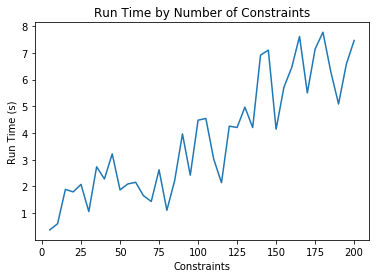

In [24]:
m()